In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [79]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [80]:
train_df[:3]

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [81]:
#print shapes
print(train_df.shape)
print(test_df.shape)

(20800, 5)
(5200, 4)


In [82]:
txt_len = train_df.text.str.split().str.len()

In [83]:
txt_len.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [84]:
title_len = train_df.title.str.split().str.len()
title_len.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

<AxesSubplot:xlabel='label', ylabel='count'>

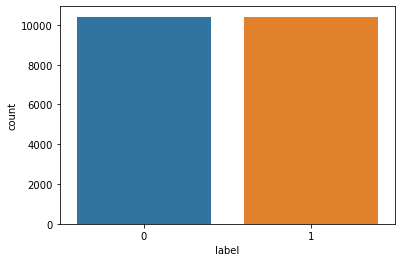

In [85]:
# Class Distribution
# 1: Unreliable
# 2: Reliable
sns.countplot(x='label', data= train_df)

In [86]:
# Handling nan values in dataset using empty spaces
def handle_nan(train_data,test_data):
    '''Input: Data to the function containing Nan values.
       Output : Cleaned data containing no Nan values.
       Function: Cleaning Nan values.
     '''
    train = train_data.fillna(" ")
    test  = test_data.fillna(" ")
    return train,test

train,test = handle_nan(train_df,test_df)

In [87]:
# Creating a variable "merged" by merging columns "title" and "author"
train["merged"] = train["title"]+" "+train["author"]
test["merged"]  = test["title"]+" "+test["author"]

In [88]:
train[:3]

,id,title,author,text,label,merged
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...


In [89]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [90]:
# Seperating Independent and dependent features
X = train.drop(columns=['label', 'index', 'id'],axis=1)
y = train['label']

In [91]:
# Creating One-Hot Representations
messages = X.copy()
messages_test = test.copy()
messages_test.drop(columns=['index', 'id'],axis=1,inplace=True)

In [92]:
messages_test[:3]

,title,author,text,merged
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...


In [93]:
# Performing data preprocessing on column 'title'
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [94]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /home/popo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
def perform_preprocess(data):
    '''Input: Data to be processed
       Output: Preprocessed data
    '''
    corpus = []
    for i in range(0,len(data)):
        review = re.sub('[^a-zA-Z]',' ',data['merged'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [96]:
train_corpus = perform_preprocess(messages)
test_corpus  = perform_preprocess(messages_test)

In [97]:
print(train_corpus[1])
print(test_corpus[1])

flynn hillari clinton big woman campu breitbart daniel j flynn
russian warship readi strike terrorist near aleppo


In [98]:
from tensorflow.keras.preprocessing.text import one_hot

In [99]:
# Converting to one-hot repr.
vocab_size = 5000
one_hot_train = [one_hot(word,vocab_size) for word in train_corpus]
one_hot_test  = [one_hot(word,vocab_size) for word in test_corpus]

In [100]:
one_hot_test[1]

[4040, 2637, 1744, 4985, 1359, 4428, 3223]

In [101]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [102]:
# Embedding Representation 
sent_length = 20
embedd_docs_train = pad_sequences(one_hot_train,padding='pre',maxlen=sent_length)
embedd_docs_test  = pad_sequences(one_hot_test,padding='pre',maxlen=sent_length)
print(embedd_docs_train)

[[   0    0    0 ...  778 2993  291]
 [   0    0    0 ... 4066 3690   99]
 [   0    0    0 ... 3147 4448 3220]
 ...
 [   0    0    0 ... 4731  213 2527]
 [   0    0    0 ... 4706 3220  957]
 [   0    0    0 ...  312 4718 2560]]


In [103]:
# Converting Embedding repr. to array
x_final = np.array(embedd_docs_train)
y_final = np.array(y)
x_test_final = np.array(embedd_docs_test)

In [104]:
# Dimensions of prev. array repr.
x_final.shape,y_final.shape,x_test_final.shape

((20800, 20), (20800,), (5200, 20))

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.1, random_state=42, stratify = y_final)
X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
x_test_final = x_test_final

In [107]:
model_1 = LogisticRegression(max_iter=9000)
model_1.fit(X_train,Y_train)
pred_1 = model_1.predict(x_test)
cr1 = classification_report(y_test,pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1039
           1       0.74      0.69      0.72      1041

    accuracy                           0.73      2080
   macro avg       0.73      0.73      0.73      2080
weighted avg       0.73      0.73      0.73      2080



In [108]:
model_2 = MultinomialNB()
model_2.fit(X_train,Y_train)
pred_2 = model_2.predict(x_test)
cr2    = classification_report(y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1039
           1       0.66      0.75      0.71      1041

    accuracy                           0.68      2080
   macro avg       0.69      0.68      0.68      2080
weighted avg       0.69      0.68      0.68      2080



In [109]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train,Y_train)
pred_3 = model_3.predict(x_test)
cr3    = classification_report(y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1039
           1       0.92      0.89      0.90      1041

    accuracy                           0.91      2080
   macro avg       0.91      0.91      0.91      2080
weighted avg       0.91      0.91      0.91      2080



In [110]:
model_4 = RandomForestClassifier()
model_4.fit(X_train,Y_train)
pred_4 = model_4.predict(x_test)
cr4    = classification_report(y_test,pred_4)
print(cr4)

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      1039
           1       0.88      0.95      0.91      1041

    accuracy                           0.91      2080
   macro avg       0.91      0.91      0.91      2080
weighted avg       0.91      0.91      0.91      2080



In [111]:
#import xgboost as xgb
from xgboost import XGBClassifier

In [112]:
model_5 = XGBClassifier()
model_5.fit(X_train,Y_train)
pred_5 = model_5.predict(x_test)
cr5    = classification_report(y_test,pred_5)
print(cr5)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1039
           1       0.97      0.99      0.98      1041

    accuracy                           0.98      2080
   macro avg       0.98      0.98      0.98      2080
weighted avg       0.98      0.98      0.98      2080



In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

In [114]:
# Creating the LSTM Model for prediction
embedding_feature_vector = 40
model = Sequential()
model.add(Embedding(vocab_size,embedding_feature_vector,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [115]:
# Training the model
model.fit(X_train,Y_train,validation_data=(x_valid,y_valid),epochs=10,batch_size=64)

Epoch 1/10
264/264 [==============================] - 2s 4ms/step - loss: 0.2134 - accuracy: 0.9007 - val_loss: 0.0467 - val_accuracy: 0.9850
Epoch 2/10
264/264 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9913 - val_loss: 0.0171 - val_accuracy: 0.9963
Epoch 3/10
264/264 [==============================] - 1s 3ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.0174 - val_accuracy: 0.9941
Epoch 4/10
264/264 [==============================] - 1s 3ms/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.0190 - val_accuracy: 0.9957
Epoch 5/10
264/264 [==============================] - 1s 4ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0169 - val_accuracy: 0.9952
Epoch 6/10
264/264 [==============================] - 1s 3ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0137 - val_accuracy: 0.9941
Epoch 7/10
264/264 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0195 - val_accuracy: 0.9957
Epoch 

In [116]:
predict_x = model.predict(x_test)
predictions = np.argmax(predict_x,axis=1)
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1039
           1       0.00      0.00      0.00      1041

    accuracy                           0.50      2080
   macro avg       0.25      0.50      0.33      2080
weighted avg       0.25      0.50      0.33      2080



/home/popo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/popo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/popo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
score_1 = accuracy_score(y_test,pred_1)
score_2 = accuracy_score(y_test,pred_2)
score_3 = accuracy_score(y_test,pred_3)
score_4 = accuracy_score(y_test,pred_4)
score_5 = accuracy_score(y_test,pred_5)
#score_6 = accuracy_score(y_test,pred_6)
score_7 = accuracy_score(y_test,predictions)
results = pd.DataFrame([["Logistic Regression",score_1],["Naive Bayes",score_2],["Decision Tree",score_3],
                       ["Random Forest",score_4],["XGBOOST",score_5],["LSTM",score_7*2]],columns=["Model","Accuracy"])

results

,Model,Accuracy
0,Logistic Regression,0.725962
1,Naive Bayes,0.684615
2,Decision Tree,0.905288
3,Random Forest,0.910096
4,XGBOOST,0.978365
5,LSTM,0.999038


In [118]:
# Making Predictions on test data
predictions_test = pd.DataFrame(model.predict(x_test_final))
test_id = pd.DataFrame(test["id"])
submission = pd.concat([test_id,predictions_test],axis=1)
submission.columns = ["id","label"]
submission.to_csv("Submission.csv",index=False)

In [119]:
#convert submission['label'] to nearest int
submission['label'] = submission['label'].astype(int)

In [120]:
df_submit = pd.read_csv("data/submit.csv")

In [121]:
df_submit.shape

(5200, 2)

In [122]:
submission.shape

(5200, 2)

In [123]:
#compare submission with df_submit to check the accuracy
total = 0
correct = 0
for i in range(len(df_submit)):
    if df_submit["label"][i] == submission['label'][i]:
        correct += 1
    total += 1
print(correct/total)

0.48
